In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import rasterio
import rasterio.plot
import rasterio.mask
import fiona
import shapely
import shapely.wkt

In [27]:
tiff = '../input/data/worldpop_popd/tza_pd_2001_1km_UNadj.tiff'

In [4]:
mask_wkt = 'POLYGON ((35.3265380859375 -6.672791560098641, 35.54351806640625 -7.939555962292796, 36.05987548828124 -7.520426889868663, 36.60919189453125 -7.974917742990998, 36.67510986328125 -6.6809754212657575, 35.3265380859375 -6.672791560098641))'
mask = shapely.wkt.loads(mask_wkt)

# Input file

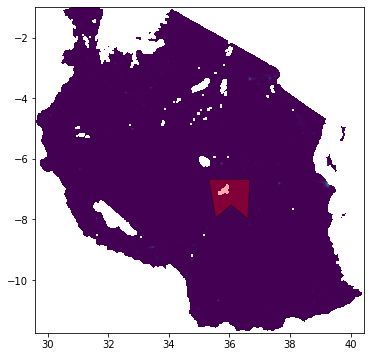

In [55]:
with rasterio.open(tiff, 'r') as src:
    nodata = src.nodata
    band = src.read(1, masked=True)
    
    # plt.imshow(band, transform=src.transform, ax=ax)

    
    # plot input data and area of interst
    fig, ax = plt.subplots(figsize=(10, 6))
    
    extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
    ax = rasterio.plot.show(src, extent=extent, ax=ax)
    
    xs, ys = mask.exterior.xy
    ax.fill(xs, ys, alpha=0.33, fc='r', ec='black')
    
    plt.show()

# Mask / crop GeoTiff with AOE

In [93]:
with rasterio.open(tiff, 'r') as src:
    nodata = src.nodata
    
    # masked data 
    # filled -> False: get a maks for the cutoff
    out_image, out_transform = rasterio.mask.mask(src, [mask], crop=True, nodata=nodata, filled=False)
    out_meta = src.meta
    band_clip = out_image[0]
    band_clip[band_clip==nodata] = np.nan

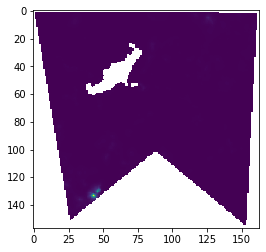

In [82]:
plt.imshow(band_clip)
plt.show()

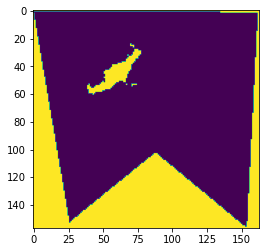

In [91]:
band_clip.mask
plt.imshow(band_clip.mask, interpolation=None)
plt.show()

In [94]:
total_cells = np.count_nonzero(~np.isnan(band_clip.mask))
set_cells = np.count_nonzero(band_clip.mask == False)

In [95]:
total_cells, set_cells

(25591, 18497)